# **<font size="7">` Dependencies (must to run)`</font>**

___

In [1]:
import sys, os, copy
import numpy as np
import matplotlib.pyplot as plt

if sys.platform == 'darwin' :
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

'main root'
main_path = os.path.abspath('../')
ds_root_path =  os.path.join(os.path.abspath('../..'),"ML_DataSet")
sys.path.append(main_path)
import tensorflow as tf
from lib.utils.common import is_path_avaiable
from lib.visualization import Vis_PoseSampleTransform, Vis_PoseSampleTopdownAffine

'basic info'
print(" tensorflow version:",tf.__version__)
print(" numpy version:", np.__version__)
print(" Python version:", sys.version)
print(" sys.platform:", sys.platform)
print(" gpu available:", tf.config.list_physical_devices('GPU'))
print(" sys.path:", sys.path)
is_path_avaiable(ds_root_path)
is_path_avaiable(main_path) 

if  sys.platform == 'win32':
    'xla issue : https://www.qiniu.com/qfans/qnso-68614547#comments'
    #libdevice_path = "C:/Users/yista/anaconda3/envs/rtx_py38_tf2-10_cu118/Library/bin"
    #os.environ['XLA_FLAGS'] = "--xla_gpu_cuda_data_dir=C:/Users/yista/anaconda3/envs/rtx_py38_tf2-10_cu118/Library/bin"
    libdevice_path = "C:/Users/yista/anaconda3/envs/rtx_py38_tf2-10_cu118/Library/bin"
    is_path_avaiable(libdevice_path)
    os.environ['XLA_FLAGS'] = "--xla_gpu_cuda_data_dir="+libdevice_path
    print(os.environ['XLA_FLAGS'])

key : BBoxesFormatTransform, value :<class 'lib.datasets.transforms.bboxes_format_transform.BBoxesFormatTransform'> >
key : ImageResize, value :<class 'lib.datasets.transforms.img_resize.ImageResize'> >
key : RandomPadImageResize, value :<class 'lib.datasets.transforms.img_resize.RandomPadImageResize'> >
key : Albumentations, value :<class 'lib.datasets.transforms.albumentations.Albumentations'> >
key : IdendityTest, value :<class 'lib.datasets.transforms.idendity_test.IdendityTest'> >
key : EnsureTensor, value :<class 'lib.datasets.transforms.ensure_to_tensor.EnsureTensor'> >
key : ImageNormalize, value :<class 'lib.datasets.transforms.img_norm.ImageNormalize'> >
key : RandomBBoxTransform, value :<class 'lib.datasets.transforms.random_bbox_transform.RandomBBoxTransform'> >
key : RandomFlip, value :<class 'lib.datasets.transforms.random_flip.RandomFlip'> >
key : RandomChannelShift, value :<class 'lib.datasets.transforms.random_channel_shift.RandomChannelShift'> >
key : RandomContrast, 

c:\Users\yista\anaconda3\envs\rtx_py38_tf2-10_cu118\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


key : dataloader, value :<class 'lib.datasets.tfds_builder.dataloader'> >
key : Parser_CocoSinglePoseTFRec_CocoPoseStyle, value :<class 'lib.datasets.tfrec_parsers.coco_dataset.Parser_CocoSinglePoseTFRec_CocoPoseStyle'> >
key : CocoStyleBBoxDataset_Parser, value :<class 'lib.datasets.tfrec_parsers.coco_dataset.CocoStyleBBoxDataset_Parser'> >
key : Parser_CocoMultiPoseTFRec_CocoPoseStyle, value :<class 'lib.datasets.tfrec_parsers.coco_dataset.Parser_CocoMultiPoseTFRec_CocoPoseStyle'> >
key : Parser_CocoMultiPoseTFRec_CocoDetStyle, value :<class 'lib.datasets.tfrec_parsers.coco_dataset.Parser_CocoMultiPoseTFRec_CocoDetStyle'> >
key : Parser_AicTopdownTFRec_CocoPoseStyle, value :<class 'lib.datasets.tfrec_parsers.aic_dataset.Parser_AicTopdownTFRec_CocoPoseStyle'> >
 tensorflow version: 2.10.0
 numpy version: 1.24.3
 Python version: 3.8.16 (default, Mar  2 2023, 03:18:16) [MSC v.1916 64 bit (AMD64)]
 sys.platform: win32
 gpu available: [PhysicalDevice(name='/physical_device:GPU:0', device_

### **<font size="6">`HyperParams`</font>**

In [2]:
'MODEL Type'
MODEL_TYPE = 'mvla_det'
PROJECT_NAME = 'YOLOv7'
MODEL_INPUT_SIZE_HW = (640,640)
MODEL_INPUT_SIZE_WH = MODEL_INPUT_SIZE_HW[::-1]
YOLO_FPN_ANCHORS_CFG = {
        "img_size": [640,640], 
        "anchor_sizes": [ 
            [   [12,16],   [19,36],   [40,28] ], 
            [   [36,75],   [76,55],  [72,146] ], 
            [ [142,110], [192,243], [459,401] ] 
        ],
        "strides" : [8, 16, 32],
        "feature_map_shapes": [80,40,20],
        "fpn_balance" : [4., 1., 0.4],
}

# 'Golbal Settings'
USE_MIXED_PRECISION = True if sys.platform != 'darwin' else False
BATCH_SIZE = 32
PREFETCH_SIZE = 4
BATCH_NORM_EPSILON = 1e-5  #torch  :  bn_eps = 1e-5,  tensorflow : bn_eps = 1e-3
BATCH_NORM_MOMENTUM = 0.9  #torch  :  bn_moentum = 0.9,  tensorflow : bn_moentum = 0.99
CODEC_PARALLEL_ITERS = BATCH_SIZE  #parallel_iterations
CV_TRANS_PARALLEL_ITERS = BATCH_SIZE  #parallel_iterations
'Training'
TOTAL_EPOCHS = 200
WARMUP_EPOCHS = TOTAL_EPOCHS//10
LR = 1e-3
# "path"
PATH_BACKBONE_FEATURE_VEC = None
PATH_TO_SAVE_MODEL = None
PATH_TO_SAVE_EMA_MODEL = None
PATH_TO_LOAD_MODEL = None
PATH_TO_LOAD_EMA_MODEL= None


# 'dataset'
# DS_ROOT = ds_root_path
# DS_NAME = "COCO-WholeBody"
# ds_main_path =  os.path.join(ds_root_path,"COCO-WholeBody")
# is_path_avaiable(ds_main_path)
# train_tfrec_kps_dir = os.path.join(ds_main_path, "tfrecords_kps_train")
# is_path_avaiable(train_tfrec_kps_dir)

# 'cfg of train dataset parser'
# CFG_TRAIN_TFREC_DS = dict(
#     type = 'Parser_CocoSinglePoseTFRec_CocoPoseStyle', 
#     data_root = train_tfrec_kps_dir if os.path.exists(train_tfrec_kps_dir) else ,
# )
# # CFG_TRAIN_TFREC_DS

## **<font size="6">`Mixed Precision (Optional)`</font>**

In [3]:
from tensorflow.keras import mixed_precision
if USE_MIXED_PRECISION :
    policy = mixed_precision.Policy('mixed_float16')
else:
    policy = mixed_precision.Policy('float32')
mixed_precision.set_global_policy(policy)
print('Compute dtype: %s' % policy.compute_dtype)
print('Variable dtype: %s' % policy.variable_dtype)

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3070 Laptop GPU, compute capability 8.6
Compute dtype: float16
Variable dtype: float32


## **<font size="6">`Data Paths`</font>**

In [ ]:
'dataset root'
ds_main_path =  os.path.join(ds_root_path,"COCO-WholeBody")
is_path_avaiable(ds_main_path)

'train/ val dataset path --- multi poses'
val_mp_tfrec_dir = os.path.join(ds_main_path, "tfrecords_multi_poses_val")
train_mp_tfrec_dir = os.path.join(ds_main_path, "tfrecords_multi_poses_train")

'verify whether tfrecords_dir is exist'
is_path_avaiable(val_mp_tfrec_dir)
is_path_avaiable(train_mp_tfrec_dir)


# 'pretrained model lib'
# #lib_main_path =  os.path.join(os.path.abspath('../..'),"trained")
# lib_main_path = os.path.join(
#     os.path.abspath('../..'), "trained", MODEL_TYPE, PROJECT_NAME
# )
# is_path_avaiable(lib_main_path)



successfully connect floder  : 
h:\deep_learning\ML_DataSet\COCO-WholeBody

successfully connect floder  : 
h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_val

successfully connect floder  : 
h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_train

successfully connect floder  : 
h:\deep_learning\trained\mvla_pose\HRNet



# **<font size="7">` 1. Build DataLoader`</font>**

### **<font size="6">`Explore loaded samples from  pasrsed TFRecData`</font>**

## **<font size="6">`1-1. Train data pipeline `</font>**

register : <tfds_pipeline>  init ...................from internal libs


 All Modules of registry < tfds_pipeline >have been automatically imported from lib.datasets

--------------register : <tfds_pipeline>  Update Done-----from internal libs

successfully connect floder  : 
h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_train



h:\deep_learning\project_sample_V0.7\lib\datasets\tfds_builder.py:86: UserWarning: codec is None, you cannot gen targets used in traaining, but test_mode to review data is ok @pose_dataloader
  warnings.warn("codec is None, you cannot gen targets used in traaining, but test_mode to review data is ok @pose_dataloader")


samples_in_tfrec : 4269 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_train\file_00-4269.tfrec>
samples_in_tfrec : 2899 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_train\file_01-2899.tfrec>
samples_in_tfrec : 3523 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_train\file_02-3523.tfrec>
samples_in_tfrec : 4124 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_train\file_03-4124.tfrec>
samples_in_tfrec : 4701 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_train\file_04-4701.tfrec>
samples_in_tfrec : 5047 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_train\file_05-5047.tfrec>
samples_in_tfrec : 5178 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_train\file_06-5178.tfrec>
samples_in_tfrec : 4789 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_train\file_07-4789.tfrec>
samples_in_tfrec : 3984 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_train\file_08-3984.tfrec>
samples_in

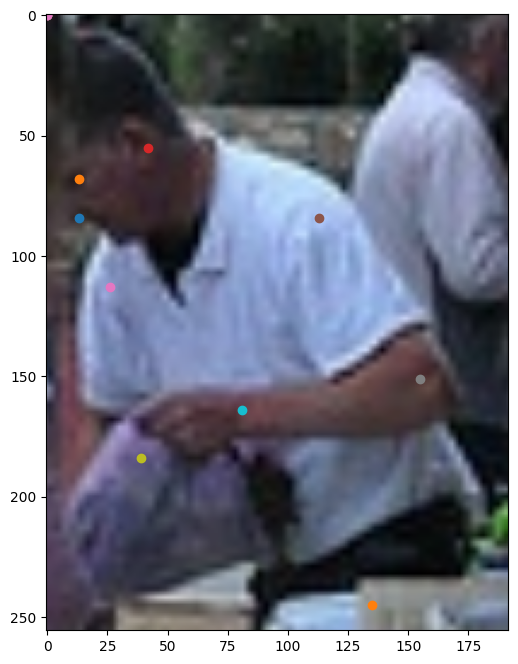

In [8]:
import copy
from lib.Registers import DATASETS
from lib.datasets.transforms import PackInputTensorTypeSpec

'#0 train / val dataset path'
tfrec_train_dataset_cfg = dict(
    type = 'BaseCocoStyleDataset_Parser', 
    data_root = train_tfrec_kps_dir,
)

tfrec_train_dataset_cfg = dict(
    type = 'Parser_CocoSinglePoseTFRec_CocoPoseStyle', 
    data_root = train_tfrec_kps_dir,
)

IdendityTest_cfg = dict(type='IdendityTest')

flip_cfg = dict(type='RandomFlip',prob=0.5)

halfbody_cfg = dict(
    type='RandomHalfBody',
    prob=0.5, 
    upper_prioritized_prob= 0.7,
    padding = 1.5,
    min_total_keypoints = 9, 
    min_upper_keypoints = 4,
    min_lower_keypoints = 4
)

bbox_cfg = dict(
    type='RandomBBoxTransform',  
    shift_factor = 0.16, 
    shift_prob = 0.5, 
    scale_factor = (0.75, 1.25), 
    scale_prob = 0.5 ,
)


contrast_cfg = dict(type = 'RandomContrast',
                value_range =(0,255), 
                factor =(0.3, 0.8),
                prob = 0.5,
                test_mode=False
)

hsv_cfg = dict(type='RandomHSVAug',  
            hue_prob = 0.5,
            saturation_prob = 0.5,
            brightness_prob = 0.5,
            hue_delta = 0.3, 
            saturation_factor = (0.5,2.0),
            brightness_delta = 0.4
)

blur_cfg = dict(type='RandomGaussianBlur', 
                kernel_size_xy=(5,5),
                factor=3.0,
                prob =0.5,
                test_mode=True
)
kpsdrop_cfg = dict(type='RandomKPSDropout',   
                base_mask_ratio = 0.05,
                mask_scale_factor = (0.8, 1.2),
                min_bbox_area = 64.*64.,
                prob=0.5, 
                drop_joints_indices=[5,6,7,8,11,12],
                random_mask_color=False, 
                test_mode =False
)


affine_cfg = dict(
    type='TopdownAffine',
    is_train = True, 
    test_mode = False,   
    do_clip = True,      
    keep_bbox_aspect_prob = 0.5,
    rotate_prob = 0.5,
    shear_prob = 0.25,
    MaxRot_deg=30., 
    MaxShear_deg=15.
)


train_dataloader_cfg =  dict(
    type = 'dataloader',
    batch_size = BATCH_SIZE,
    prefetch_size = PREFETCH_SIZE,
    shuffle  =  True,
    tfrec_datasets_list = [tfrec_train_dataset_cfg],
    augmenters = [flip_cfg, halfbody_cfg, bbox_cfg, kpsdrop_cfg, blur_cfg, affine_cfg],
    codec = None,
    ensure_to_tensor = True,
    parallel_iterations = CV_TRANS_PARALLEL_ITERS
)


train_tfds_builder = DATASETS.build(copy.deepcopy(train_dataloader_cfg))
batch_train_dataset = train_tfds_builder.GenerateTargets(
    test_mode=False, 
    unpack_x_y_sample_weight= False, 
    ds_weights =None)

train_tfds_builder.get_pipeline_cfg() 


Vis_PoseSampleTopdownAffine(
    samples = next(iter(batch_train_dataset)),   
    batch_id  =0,
)








## **<font size="6">`1-2. Val data pipeline`</font>**

successfully connect floder  : 
h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_val

samples_in_tfrec : 1880 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_val\file_00-1880.tfrec>
samples_in_tfrec : 2425 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_val\file_01-2425.tfrec>
samples_in_tfrec : 1342 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_val\file_02-1342.tfrec>
num_TotalSamples: 5647
successfully connect floder  : 
h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_val


 ----------------pipeline_cfg  (< ith > --- key : value)  -------------------
< 1 >  --- TopdownAffine : <lib.datasets.transforms.topdown_transforms.TopdownAffine object at 0x0000021F7704C910>
< 2 >  --- EnsureTensor : <lib.datasets.transforms.ensure_to_tensor.EnsureTensor object at 0x0000021F7704CDC0>
< 3 >  --- DataAdapter : <function dataloader.GenerateTargets.<locals>.<lambda> at 0x0000021F7A768DC0>
---------------------------------------------------------

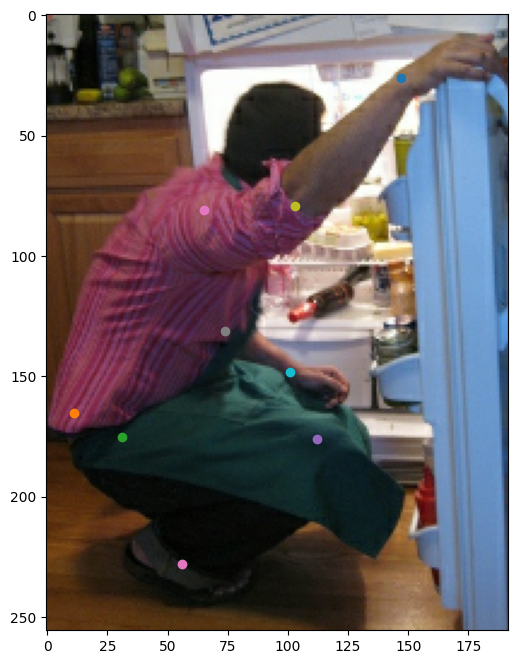

In [10]:
# tfrec_val_dataset_cfg = dict(
#     type = 'BaseCocoStyleDataset_Parser', 
#     data_root = val_tfrec_kps_dir,
# )

tfrec_val_dataset_cfg = dict(
    type = 'Parser_CocoSinglePoseTFRec_CocoPoseStyle', 
    data_root = val_tfrec_kps_dir,
)

val_affine_cfg = dict(
    type='TopdownAffine',
    is_train = False, 
    test_mode = False,   
    do_clip = True,      
    keep_bbox_aspect_prob = 1.,
    rotate_prob = 0.,
    shear_prob = 0.,
    MaxRot_deg=0., 
    MaxShear_deg=0.
)

val_dataloader_cfg =  dict(
    type = 'dataloader',
    batch_size = BATCH_SIZE,
    prefetch_size = PREFETCH_SIZE,
    shuffle  =  False,
    tfrec_datasets_list = [tfrec_val_dataset_cfg],
    augmenters = [val_affine_cfg],
    codec = None,
    ensure_to_tensor = True
)

val_tfds_builder = DATASETS.build(
    copy.deepcopy(val_dataloader_cfg)
)
batch_val_dataset = val_tfds_builder.GenerateTargets(
    test_mode=False,
    unpack_x_y_sample_weight= False, 
    ds_weights =None)

val_tfds_builder.get_pipeline_cfg() 


Vis_PoseSampleTopdownAffine(
    samples = next(iter(batch_val_dataset)),   
    batch_id  =0,
)

# **<font size="7">` 2. Task Modeling`</font>**

## **<font size="6">` Backbone Test (optional)`</font>**

In [8]:
from lib.models.backbones import YOLOv7Backbone
model = YOLOv7Backbone(
    model_input_shape=(640,640),
    stem_width = 32,
    stem_type = 'Tiny',
    channels  = [64, 128, 256, 512],
    stack_in_planes = [32, 64, 128, 256],
    stack_concats = [-1, -2,-3,-4],
    stack_depth = 4,
    stack_out_ratio  = 0.5,
    SPPCSPC_depth = 1,
    activation = 'silu',
    data_preprocessor= dict(
        type='ImgNormalization', 
        img_mean = [0.485, 0.456, 0.406],  
        img_std = [0.229, 0.224, 0.225]
    )
)

model.summary(200)


Model: "YOLOv7Backbone"
________________________________________________________________________________________________________________________________________________________________________________________________________
 Layer (type)                                                     Output Shape                                Param #                 Connected to                                                      
 input_3 (InputLayer)                                             [(None, 640, 640, 3)]                       0                       []                                                                
                                                                                                                                                                                                        
 img_normalization_2 (ImgNormalization)                           (None, 640, 640, 3)                         0                       ['input_3[0][0]']                     

In [9]:
model.output

<KerasTensor: shape=(None, 20, 20, 256) dtype=float16 (created by layer 'feat_P5_20x20')>

## **<font size="6">` Neck Test (optional)`</font>**

In [9]:
from lib.models.necks import PathAggregationFPN_ELAN
pafpn = PathAggregationFPN_ELAN(
    fpn_channel_ratio = 0.5,
    fpn_stack_depth = 4 ,  
    fpn_stack_concats =[-1, -2, -3, -4],
    fpn_stack_in_ratio = 0.25,
    fpn_stack_mid_ratio = 1.0,
    activation = 'silu',
    simple_downsample = True,
    scope_marks = '_',
    wrapped_model = False,
    name='Neck'
                        
)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
feat_p3 = Input((80,80,128))
feat_p4 = Input((40,40,256))
feat_p5 = Input((20,20,256))
features = [feat_p3,feat_p4,feat_p5]
out = pafpn(features)
model = Model(features,out)
model.summary(200, expand_nested=True)


Model: "model"
________________________________________________________________________________________________________________________________________________________________________________________________________
 Layer (type)                                                     Output Shape                                Param #                 Connected to                                                      
 input_5 (InputLayer)                                             [(None, 20, 20, 256)]                       0                       []                                                                
                                                                                                                                                                                                        
 input_4 (InputLayer)                                             [(None, 40, 40, 256)]                       0                       []                                             

## **<font size="6">` Head Test (optional)`</font>**

In [12]:
from lib.models.heads import YOLO_AnchorBaseHead
from lib.models import HEADS
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

head_cfg = dict(
    type = 'YOLO_AnchorBaseHead',
    num_anchors= 3, 
    num_classes=4,
    use_reparam_conv_head = True,
    dict_format_output = False,
    activation = 'swish',
    bn_epsilon = 1e-5,
    bn_momentum = 0.9,
    deploy =  False,
    scope_marks = '_',
    wrapped_model = False,
    name='YOLOv7_Head'
)

head = HEADS.build(head_cfg)


feat_p3 = Input((80,80,64))
feat_p4 = Input((40,40,128))
feat_p5 = Input((20,20,256))
features = [feat_p3,feat_p4,feat_p5]
out = head(features)
model = Model(features, out)
model.summary(200, expand_nested=True)

Model: "model_3"
________________________________________________________________________________________________________________________________________________________________________________________________________
 Layer (type)                                                     Output Shape                                Param #                 Connected to                                                      
 input_12 (InputLayer)                                            [(None, 80, 80, 64)]                        0                       []                                                                
                                                                                                                                                                                                        
 input_13 (InputLayer)                                            [(None, 40, 40, 128)]                       0                       []                                           

In [15]:
model.output

[<KerasTensor: shape=(None, 80, 80, 3, 9) dtype=float16 (created by layer 'P3_output')>,
 <KerasTensor: shape=(None, 40, 40, 3, 9) dtype=float16 (created by layer 'P4_output')>,
 <KerasTensor: shape=(None, 20, 20, 3, 9) dtype=float16 (created by layer 'P5_output')>]

## **<font size="6">` Codec Test (optional)`</font>**

In [9]:
from lib.models import BaseModel
from lib.Registers import CODECS
codec_cfg = dict(   
    type = 'MSRAHeatmapCodec',
    use_udp = True, 
    num_kps = 17,
    sigma = 2,
    target_size_xy = (192,256),
    heatmap_size_xy = (48, 64),
    hm_thr= tf.zeros(shape=(17,), dtype=tf.float32),
    use_vectorized_map  = False,
    parallel_iterations  = CODEC_PARALLEL_ITERS,
)

CODECS.build(codec_cfg)

(13, 13, 2) (2,)


## **<font size="6">`2-1. Build Model`</font>**

In [15]:
from lib.models import BaseModel

YOLOv7Backbone_cfg = dict(
    type = 'YOLOv7Backbone',
    model_input_shape=(640,640),
    stem_width = 32,
    stem_type = 'Tiny',
    channels  = [64, 128, 256, 512],
    stack_in_planes = [32, 64, 128, 256],
    stack_concats = [-1, -2,-3,-4],
    stack_depth = 4,
    stack_out_ratio  = 0.5,
    SPPCSPC_depth = 1,
    activation = 'swish',
    bn_epsilon = BATCH_NORM_EPSILON,
    bn_momentum = BATCH_NORM_MOMENTUM,
    data_preprocessor= dict(
        type='ImgNormalization', 
        img_mean = [0.485, 0.456, 0.406],  
        img_std = [0.229, 0.224, 0.225]
    )
)

neck_cfg = dict(
    type ='PathAggregationFPN_ELAN',
    fpn_channel_ratio = 0.5,
    fpn_stack_depth = 4 ,  
    fpn_stack_concats =[-1, -2, -3, -4],
    fpn_stack_in_ratio = 0.25,
    fpn_stack_mid_ratio = 1.0,
    activation = 'swish',
    bn_epsilon = BATCH_NORM_EPSILON,
    bn_momentum = BATCH_NORM_MOMENTUM,
    simple_downsample = False,
    scope_marks = '_',
    wrapped_model = False,
    name='YOLOv7_Neck'                    
)

head_cfg = dict(
    type = 'YOLO_AnchorBaseHead',
    num_anchors = 3, 
    num_classes = 4,
    use_reparam_conv_head = False,
    dict_format_output = False,
    activation = 'swish',
    bn_epsilon = BATCH_NORM_EPSILON,
    bn_momentum = BATCH_NORM_MOMENTUM,
    deploy =  False,
    scope_marks = '_',
    wrapped_model = False,
    name='YOLOv7_Head'
)
        
codec_cfg = dict(
    type='YoloAnchorBaseCodec',
    num_classes = 4,
    label_start_id  = 1,
    gt_bbox_format = 'xywh', 
    confidence_threshold = 0.5,
    nms_iou_threshold = 0.5,
    max_detections_per_class = 10,
    max_detections = 10
)



# codec_cfg = dict(
#         type = "YoloAnchorFreeCodec",
#         num_classes = 4,
#         image_shape = (640,640),
#         max_anchor_matches=10,
#         strides=[8, 16, 32],
#         with_auxiliary_dfl_regression = False,
#         alpha=1.0,
#         beta=6.0,
#         epsilon=1e-9,
#         cls_label_shift = -1,
#         gt_bbox_format = 'xywh'
# )    


# Optimzer_cfg = dict(
#         type="experimental.AdamW", 
#         learning_rate=0.001,
#         weight_decay=0.001, 
#         use_ema=False,
#         ema_momentum=0.99,
#         jit_compile=False
# )


# losses_cfg = [
#     dict(
#         type='YoloAnchorFreeBBoxLoss',
#         iou_type ='ciou',
#         pred_boxes_format = 'xyxy',
#         true_boxes_format = 'xyxy',
#         bbox_weight  = 7.5,
#         dfl_weight = 1.5,
#         use_dfl = True,
#         reg_max = 16,
#         image_shape =(640,640),
#         strides =[8, 16, 32],
#         reduction='sum'
#     ),
#     dict(
#         type='YoloAnchorFreeClassLoss', 
#         class_loss_weight = 0.5,
#         reduction='sum'   
#     )
# ]#type='YoloAnchorFreeBBoxLoss',

model = BaseModel(
        backbone = YOLOv7Backbone_cfg,
        neck = neck_cfg,  
        head = head_cfg,
        extract_layres = ['feat_P3_80x80', 'feat_P4_40x40','feat_P5_20x20'],
        codec = codec_cfg,
        optimizer  = None,
        metrics = None,
        losses = None,
        pretrained_weights_path  = None,
        name= "YOLOv7Det-Tiny_HumanDet"
)   

extract_layer :  feat_P3_80x80
extract_layer :  feat_P4_40x40
extract_layer :  feat_P5_20x20
register : <codec>  init ...................from internal libs


 All Modules of registry < codec >have been automatically imported from lib.codecs

--------------register : <codec>  Update Done-----from internal libs

input image_shape :640.0x640.0 ---(anchor_normalize :True)
fpn_anchors_level_0: (80, 80, 3, 4) @strids=8
fpn_anchors_level_1: (40, 40, 3, 4) @strids=16
fpn_anchors_level_2: (20, 20, 3, 4) @strids=32
fpn_anchors_shape :(25200, 4)
apply bboxes_format_transform <xywh2cxcywh> 


In [14]:
model.summary(200)

Model: "YOLOv7Det-Tiny_HumanDet"
________________________________________________________________________________________________________________________________________________________________________________________________________
 Layer (type)                                                     Output Shape                                Param #                 Connected to                                                      
 input_7 (InputLayer)                                             [(None, 640, 640, 3)]                       0                       []                                                                
                                                                                                                                                                                                        
 img_normalization_6 (ImgNormalization)                           (None, 640, 640, 3)                         0                       ['input_7[0][0]']            

In [6]:
from lib.Registers import MODELS
from lib.models import BaseModel
hrnet_backbone_cfg = dict(
        type ='HRNet',
        model_input_shape=(256,192),         
        num_modules = [1,1,4,3],
        num_blocks  = [4,4,4,4],
        branches_channels = [32,64,128,256],
        interpolation  = 'bilinear',
        psa_type = None,
        multiscale_output= False,
        data_preprocessor = dict(
            type='ImgNormalization', 
            img_mean = [0.485, 0.456, 0.406],  
            img_std = [0.229, 0.224, 0.225]
        ),
        activation = 'relu',
        bn_epsilon = BATCH_NORM_EPSILON,
        bn_momentum = BATCH_NORM_MOMENTUM,
        name = "HRNetW32",
        deploy = False
)   


heatmap_head_cfg = dict(
    type ='HeatmapBaseHead',
    out_channels = 17,
    deconv_filters_list =[], 
    deconv_kernels_list = [],
    conv_kernel_szie=None,
    conv_out_channels= None,
    bn_epsilon = BATCH_NORM_EPSILON,
    bn_momentum = BATCH_NORM_MOMENTUM,
)   


Optimzer_cfg = dict(
    type="Adam", 
    learning_rate=LR,
)

Loss_cfg_list = [  
    dict(
        type = 'KeypointsMSELoss',
        joints_balance_weights = [
            1., 1., 1., 1., 1., 1., 1., 1.2, 1.2,
            1.5, 1.5, 1., 1., 1.2, 1.2, 1.5, 1.5
        ],
        loss_weight = 1.0                          
    ) 
]

metric_cfg_dict =  [ 
    dict(
        type = 'PCKMetric',
        tf_dists = 0.5, 
        num_kps = 17,
        hm_thr= [
            0.75, 0.75, 0.75, 0.75, 0.75,
            0.25, 0.25, 0.25, 0.25, 0.25,
            0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25
        ]            
    )
]

codec_cfg = dict(   
    type = 'MSRAHeatmapCodec',
    use_udp = True, 
    num_kps = 17,
    sigma = 2,
    target_size_xy = (192,256),
    heatmap_size_xy = (48, 64),
    hm_thr= tf.concat(
        [
            tf.ones(shape=(5,), dtype=tf.float32)*0.75, 
            tf.ones(shape=(12,), dtype=tf.float32)*0.5
        ], 
        axis=-1
    ),
    use_vectorized_map  = False,
    parallel_iterations  = CODEC_PARALLEL_ITERS,
)

model = BaseModel(
    backbone = hrnet_backbone_cfg,
    neck  = None,
    head  = heatmap_head_cfg,
    extract_layres = [],
    codec = codec_cfg,
    optimizer = Optimzer_cfg,  # optimizer
    losses  = Loss_cfg_list,
    metrics  = metric_cfg_dict, 
    jit_compile = False,
    name = 'HRNetPose_W32'
)

model.output       

key : RelativePositionalEmbedding, value :<class 'lib.layers.transformers.rel_pos_embs.RelativePositionalEmbedding'> >
key : AddRelativePositionBiasT5, value :<class 'lib.layers.transformers.rel_pos_embs.AddRelativePositionBiasT5'> >
key : RotaryPositionEmbedding, value :<class 'lib.layers.transformers.rope.RotaryPositionEmbedding'> >
key : GatedAttentionUnit, value :<class 'lib.layers.transformers.gau.GatedAttentionUnit'> >
key : ImgNormalization, value :<class 'lib.layers.pre_processors.img_norm.ImgNormalization'> >
key : ViT, value :<class 'lib.models.backbones.vit.ViT'> >
key : ResidualStepsBlock, value :<class 'lib.models.modules.rsb.ResidualStepsBlock'> >
key : CSPNeXt, value :<class 'lib.models.backbones.cspnext.CSPNeXt'> >
key : CSPNeXt_L, value :<function CSPNeXt_L at 0x0000021D89689AF0> >
key : CSPNeXt_M, value :<function CSPNeXt_M at 0x0000021D896A5790> >
key : CSPNeXt_S, value :<function CSPNeXt_S at 0x0000021D896A5820> >
key : CSPNeXt_Tiny, value :<function CSPNeXt_Tiny at

<KerasTensor: shape=(None, 64, 48, 17) dtype=float32 (created by layer 'HeatmapBaseHead_pwConv_OUT')>

tf.Tensor(
[[[1 0 0 0]
  [1 0 0 1]
  [1 0 0 0]
  [1 0 0 1]]

 [[1 1 1 0]
  [1 0 0 0]
  [1 1 0 0]
  [1 1 1 0]]

 [[0 0 0 0]
  [1 1 1 0]
  [1 1 0 1]
  [0 1 0 0]]

 [[0 0 1 1]
  [0 1 0 1]
  [1 0 0 0]
  [0 1 1 1]]

 [[1 0 0 0]
  [1 0 0 1]
  [0 0 1 1]
  [0 1 0 0]]

 [[1 0 0 1]
  [0 1 0 1]
  [1 0 1 1]
  [1 0 0 1]]

 [[1 1 0 1]
  [1 0 0 0]
  [1 0 0 0]
  [0 0 0 1]]

 [[0 1 0 1]
  [0 0 1 1]
  [1 0 1 1]
  [1 0 1 0]]], shape=(8, 4, 4), dtype=int32)


<tf.Tensor: shape=(60, 3), dtype=int64, numpy=
array([[0, 0, 0],
       [0, 1, 0],
       [0, 1, 3],
       [0, 2, 0],
       [0, 3, 0],
       [0, 3, 3],
       [1, 0, 0],
       [1, 0, 1],
       [1, 0, 2],
       [1, 1, 0],
       [1, 2, 0],
       [1, 2, 1],
       [1, 3, 0],
       [1, 3, 1],
       [1, 3, 2],
       [2, 1, 0],
       [2, 1, 1],
       [2, 1, 2],
       [2, 2, 0],
       [2, 2, 1],
       [2, 2, 3],
       [2, 3, 1],
       [3, 0, 2],
       [3, 0, 3],
       [3, 1, 1],
       [3, 1, 3],
       [3, 2, 0],
       [3, 3, 1],
       [3, 3, 2],
       [3, 3, 3],
       [4, 0, 0],
       [4, 1, 0],
       [4, 1, 3],
       [4, 2, 2],
       [4, 2, 3],
       [4, 3, 1],
       [5, 0, 0],
       [5, 0, 3],
       [5, 1, 1],
       [5, 1, 3],
       [5, 2, 0],
       [5, 2, 2],
       [5, 2, 3],
       [5, 3, 0],
       [5, 3, 3],
       [6, 0, 0],
       [6, 0, 1],
       [6, 0, 3],
       [6, 1, 0],
       [6, 2, 0],
       [6, 3, 3],
       [7, 0, 1],
       [7, 0, 3],

In [ ]:
model.summary(200)

### **<font size="5">` Load Model Weights`</font>**

In [ ]:
h5_file_name = 'td-hm_HRNet-w32_udp-b64-200e_coco-256x192.h5'
file_path = os.path.join(
    lib_main_path, h5_file_name
)
is_path_avaiable(file_path)
model.load_weights(file_path,skip_mismatch=True,by_name=True)


### **<font size="5">` Mini Training Test (Optional)`</font>**

In [ ]:
history = model.fit(
    batch_train_dataset, 
    epochs = 5, 
    steps_per_epoch = 4,
    validation_data = batch_val_dataset,
    validation_steps = 2,
)


## **<font size="6">`2-2. Callbacks`</font>**

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, ReduceLROnPlateau
from lib.callbacks import CosineDecayScheduler, EMA_ModelCheckpoint


train_steps_per_epoch = train_tfds_builder.ds_steps_per_epoch
val_steps_per_epoch = val_tfds_builder.ds_steps_per_epoch
STEPS_PER_EPOCH = train_steps_per_epoch

ema_h5_file_name = 'td-hm_HRNet-w32_udp-b64-200e_coco-256x192_EMA.h5'
h5_file_name = 'td-hm_HRNet-w32_udp-b64-200e_coco-256x192.h5'
ema_file_path = os.path.join(lib_main_path, ema_h5_file_name)
file_path = os.path.join(lib_main_path,h5_file_name)


callbacks = [
    EarlyStopping(
        monitor = 'pckval_acc',  # "val_loss"
        patience=20
    ),
    EMA_ModelCheckpoint(
        ema_file_path,
        decay = 0.999, 
        val_use_ema_weights = True,
        verbose=1
    ) ,
    # ModelCheckpoint(
    #     filepath = file_path,
    #     monitor="loss",
    #     verbose=1,
    #     save_best_only=True,
    #     save_weights_only=True
    # ),
    CosineDecayScheduler(
        learning_rate  = LR,
        alpha = 0.,
        total_epochs = TOTAL_EPOCHS,
        steps_per_epoch = STEPS_PER_EPOCH,
        warmup_steps = STEPS_PER_EPOCH*TOTAL_EPOCHS//10, # STEPS_PER_EPOCH*TOTAL_EPOCHS/10
        warmup_steps_update = 100,
        hold_epochs =20,
        base_decay_cycle_epochs = -1,
        t_mul=1.,
        m_mul=1.
    ) ,
    TensorBoard(
        log_dir='logs'
    ),
]

### **<font size="5">` lr`</font>**

In [9]:
train_steps_per_epoch = train_tfds_builder.ds_steps_per_epoch
val_steps_per_epoch = val_tfds_builder.ds_steps_per_epoch
from lib.callbacks import CosineDecayScheduler

#TOTAL_EPOCHS = 230     
#LR = 1e-3   
STEPS_PER_EPOCH = train_steps_per_epoch

lr_callback = CosineDecayScheduler(
    learning_rate  = LR,
    alpha = 0.,
    total_epochs = TOTAL_EPOCHS,
    steps_per_epoch = STEPS_PER_EPOCH,
    warmup_steps = STEPS_PER_EPOCH*TOTAL_EPOCHS//10, # STEPS_PER_EPOCH*TOTAL_EPOCHS/10
    warmup_steps_update = 100,
    hold_epochs =20,
    base_decay_cycle_epochs = -1,
    t_mul=1.,
    m_mul=1.
) 
lr_callback.test()

NameError: name 'val_tfds_builder' is not defined

### **<font size="5">`EMA Test(optional)`</font>**

In [ ]:
from lib.callbacks import EMA_ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint      
model_type= 'mvla_pose'
project_name = 'HRNet'
ema_h5_file_name = 'td-hm_HRNet-w32_udp-b64-200e_coco-256x192_EMA_Test.h5'
h5_file_name = 'td-hm_HRNet-w32_udp-b64-200e_coco-256x192_Test.h5'

ema_file_path = os.path.join(lib_main_path, ema_h5_file_name)
file_path = os.path.join(lib_main_path, h5_file_name)

chekpoint = ModelCheckpoint(
    filepath = file_path,
    monitor="loss",
    verbose=1,
    save_best_only=False,
    save_weights_only=True
)

ema_chekpoint = EMA_ModelCheckpoint(
    ema_file_path,
    decay = 0.999, 
    val_use_ema_weights = True,
    verbose=1
)    

callbacks = [ema_chekpoint, chekpoint]
        
history = model.fit(
    batch_train_dataset, 
    epochs = 5, 
    steps_per_epoch = 4,
    validation_data = batch_val_dataset,
    validation_steps = 2,
    callbacks=callbacks
)



### **<font size="5">`TensorBoard(optional)`</font>**

## **<font size="6">` 2-3. Training`</font>**


In [ ]:
history = model.fit(
    batch_train_dataset, 
    epochs = 200, 
    steps_per_epoch = train_steps_per_epoch,
    validation_data = batch_val_dataset,
    validation_steps = val_steps_per_epoch,
    callbacks=callbacks
)

### **<font size="5">` Mini Training Test (Optional)`</font>**

In [11]:

#callbacks = []
history = model.fit(
    batch_train_dataset, 
    epochs = 5, 
    steps_per_epoch = 4,
)

# history = model.fit(
#     batch_train_dataset, 
#     epochs = 5, 
#     steps_per_epoch = 4,
#     validation_data = batch_val_dataset,
#     validation_steps = 2,
# )


init ModelingTask ..............
Epoch 1/5
4/4 [==============================] - 55s 608ms/step - loss: 13.3080 - pck_acc: 0.0000e+00
Epoch 2/5
4/4 [==============================] - 2s 578ms/step - loss: 4.9438 - pck_acc: 0.0000e+00
Epoch 3/5
4/4 [==============================] - 2s 553ms/step - loss: 0.7268 - pck_acc: 0.0390
Epoch 4/5
4/4 [==============================] - 2s 559ms/step - loss: 0.4182 - pck_acc: 0.0000e+00
Epoch 5/5
4/4 [==============================] - 2s 571ms/step - loss: 0.1533 - pck_acc: 0.1053


# **<font size="7">` 3. Evaluation`</font>**

In [ ]:
model.codec.hm_thr = tf.concat(
    [tf.ones(shape=(5,), dtype=tf.float32)*0.75, tf.ones(shape=(12,), dtype=tf.float32)*0.35], 
    axis=-1
)

batch_dataset = batch_train_dataset # batch_val_dataset / batch_train_dataset
batch_id = 8
for data in batch_dataset.take(5):
    batch_images = data['image']
    data = model.codec.batch_encode(data)
    print(data.keys())

    kps_trues = data['kps']
    hm_trues = data['y_true']
    hm_preds = model(batch_images)
    kps_preds = model.codec.batch_decode(hm_preds)
    #kps_preds, hm_preds = model.predict(batch_images, with_model_preds=True)

    plt.figure(figsize=(25,10))
    'plot pred kps'
    plt.subplot(1,4,1)
    plt.title('nms_kps_pred',fontsize= 20)
    for i in range(0,17):
        kps_x = int((kps_preds[batch_id,i,0]))
        kps_y = int((kps_preds[batch_id,i,1]))
        plt.scatter(kps_x,kps_y) 
    plt.imshow(batch_images[batch_id,:,:,:])

    plt.subplot(1,4,2)
    plt.title('kps_true',fontsize= 20)
    for i in range(0,17):
        kps_x = int((kps_trues[batch_id,i,0]))
        kps_y = int((kps_trues[batch_id,i,1]))   
        plt.scatter(kps_x,kps_y)  
    plt.imshow(batch_images[batch_id,:,:,:])

    plt.subplot(1,4,3)
    plt.title('heatmap_Pred',fontsize= 20)
    heatmaps_pred = np.array(tf.math.exp(hm_preds[batch_id,:, :, :]))
    plt.imshow(heatmaps_pred.sum(axis=2))

    plt.subplot(1,4,4)
    plt.title('heatmap_True',fontsize= 20)
    heatmaps_true = np.array(hm_trues[batch_id,:, :, :])
    plt.imshow(heatmaps_true.sum(axis=2))
